In [1]:
# this cell is more about 3-rd ask
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.integrate import odeint
import scipy.linalg as lin

g = 9.81
M = 3.6
m = 3.6
l = 1.01

eig = [-1.1, -1.2, -1.3, -1.4]

A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, g*m/M, 0, 0], [0, g*(M+m)/l/M, 0, 0]])
B = np.array([0, 0, 1/M, 1/l/M]).reshape(1, -1).T
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
#  pole placement method
pole = sig.place_poles(A.T, C.T, eig)
L_pole = pole.gain_matrix.T

# lqr method
# Q, R - random, but appropriate
Q = np.array([[1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 0, 1, 0], 
              [0, 0, 0, 1]])

R = np.array([[4, 1], [1, 4]]) 

S = lin.solve_continuous_are(A.T, C.T, Q, R)
L_lqr = np.array(np.linalg.inv(R)).dot(C).dot(S).T

In [2]:
# these cells are more about 5-th task
pole = sig.place_poles(A, B, eig)
P = -pole.gain_matrix

In [3]:
def usual(x, t, u):
    n = np.dot(A, x) + np.dot(B, u)
    return  n


def observer(x_hat, t, u, x):
#     TRY WITH BOTH: L_lqr and L_pole
    return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, C).dot(x - x_hat)

dt = 1/10000
T = 20
time = np.linspace(0, T, dt**(-1))

x = [np.array([0.01, 0.001, 0.01, 0.01])]
x_hat = [np.array([0.02, 0.002, 0.02, 0.02])/4]

for i in range(1, len(time)):
#     Use odeint between two dots,
#     but u is fixed between two poins
#     P controller u = Px
    local_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(usual, x[-1], local_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    x_hat_dot = odeint(observer, x_hat[-1], local_time, args=tuple([u, x[-1]]))
    x_hat.append(x_hat_dot[-1])


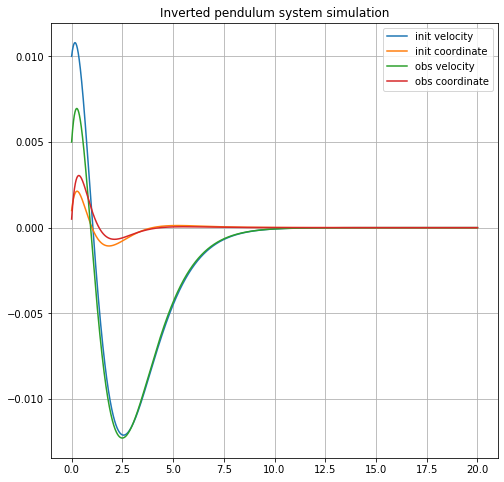

In [4]:
def plot_sim(x, x_hat, time):
    x = np.array(x)
    y = np.dot(C, x.T)
    x_hat = np.array(x_hat)
    y_hat = np.dot(C, x_hat.T)

    plt.figure(figsize=(8, 8))
    plt.title("Inverted pendulum system simulation")
    plt.plot(time, y[0], label="init velocity")
    plt.plot(time, y[1], label="init coordinate")

    plt.plot(time, y_hat[0], label="obs velocity")
    plt.plot(time, y_hat[1], label="obs coordinate")
    plt.grid()
    plt.legend()

plot_sim(x, x_hat, time)
plt.savefig("task5.png") # 3 and 5 are connected

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


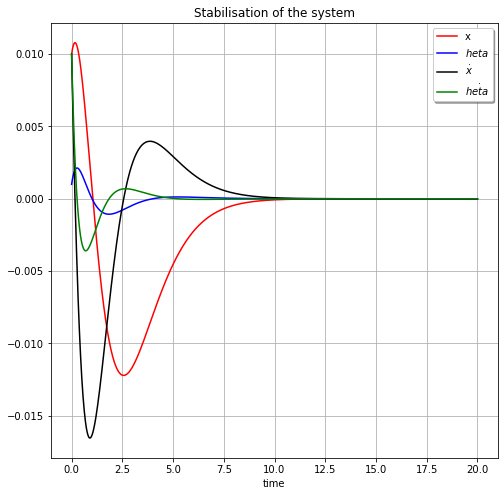

In [5]:
res_pole = sig.place_poles(A, B, eig)
K = res_pole.gain_matrix

# visualization
def control(x, t):
    return np.dot(A - np.dot(B, K), x)

time = np.linspace(0, 20, 1000)   
x0 = x[0]
res = odeint(control, x0, time).T

fig = plt.figure(figsize=(8, 8))
plt.title("Stabilisation of the system")
plt.xlabel("time")
plt.plot(time, res[0], "r-", label="x")
plt.plot(time, res[1], "b-", label="$\theta$")
plt.plot(time, res[2], "k-", label="$\dot{x}$")
plt.plot(time, res[3], "g-", label="$\dot{\theta}$")
plt.grid()
plt.legend(shadow=True)
plt.savefig("task4.png")

In [6]:
def usual(x, t, u):
    n = np.dot(A, x) + np.dot(B, u)
    return  n


def observer(x_hat, t, u, dy):
    return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, dy - np.dot(C, x_hat))

dt = 1/10000
T = 20
time = np.linspace(0, T, dt**(-1))

x = [np.array([0.01, 0.001, 0.01, 0.01])]
x_hat = [np.array([0.02, 0.002, 0.02, 0.02])/4]


for i in range(1, len(time)):
#     BUT u is fixed between two poins
#     P controller u = P
    local_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(usual, x[-1], local_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    dy = np.dot(C, x[-1]) 
    dy += np.random.random(2) * 0.0005
    x_hat_dot = odeint(observer, x_hat[-1], local_time, args=tuple([u, dy]))
    x_hat.append(x_hat_dot[-1])


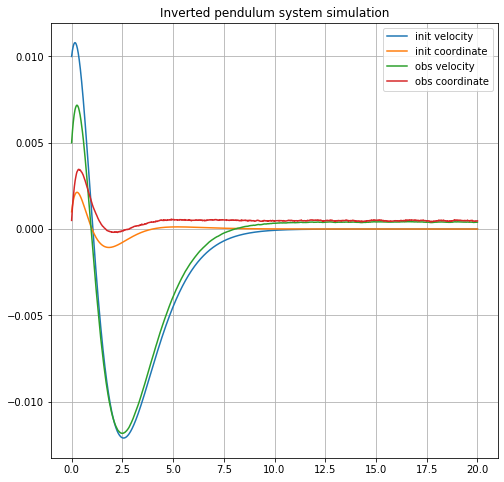

In [7]:
plot_sim(x, x_hat, time)
plt.savefig("task6.png")

In [8]:
def usual(x, t, u):
    n = np.dot(A, x) + np.dot(B, u) + np.random.random(4) * 0.00005
    return  n


def observer(x_hat, t, u, dy):
    return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, dy - np.dot(C, x_hat))

dt = 1/10000
T = 20
time = np.linspace(0, T, dt**(-1))

x = [np.array([0.01, 0.001, 0.01, 0.01])]
x_hat = [np.array([0.02, 0.002, 0.02, 0.02])/4]


for i in range(1, len(time)):
#     use odeint between two dots,
#     but u is fixed between two poins
#     P controller u = Px
    local_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(usual, x[-1], local_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    dy = np.dot(C, x[-1]) 
    dy += np.random.random(2) * 0.0005
    x_hat_dot = odeint(observer, x_hat[-1], local_time, args=tuple([u, dy]))
    x_hat.append(x_hat_dot[-1])


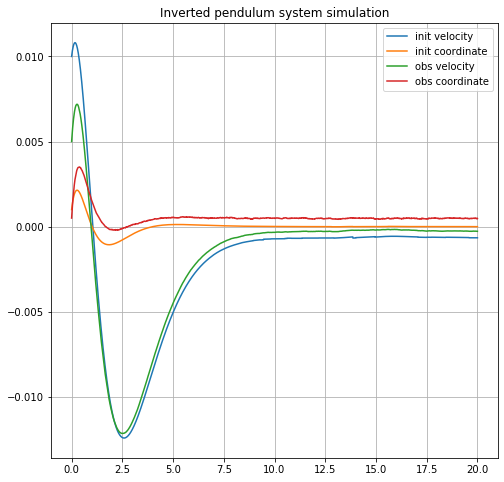

In [9]:
plot_sim(x, x_hat, time)

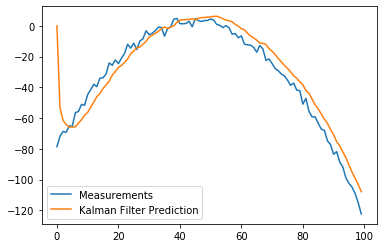

In [13]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):
        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P),  
                        (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

dt = 1.0/60
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)

x = np.linspace(-10, 10, 100)
measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 2, 100)

kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
predictions = []

for z in measurements:
    predictions.append(np.dot(H,  kf.predict())[0])
    kf.update(z)

import matplotlib.pyplot as plt
plt.plot(range(len(measurements)), measurements, label = 'Measurements')
plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
plt.legend()
plt.show()